In [1]:
!pip install seaborn pandas numpy matplotlib

You should consider upgrading via the 'c:\users\azays\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1. Load the Dataset

In [3]:
path = r"D:\My_Laptop\Downloads\CodeSoft\Genre Classification Dataset\train_data.txt"

column_names = ['ID', 'Title', 'Genre', 'Description']
train_data = pd.read_csv(path, sep=' ::: ', names=column_names, engine='python')
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
train_data.shape

(54214, 4)

## Step 2 Exploratory Data Analysis

In [5]:
train_data.isna().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [6]:
train_data.loc[0, "Description"]

'Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [19]:
# visualizing overall Word Cloud from the given data
# !pip install wordcloud
from wordcloud import WordCloud 

def viz_word_cloud(doc):   
    wc = WordCloud(background_color='black',
                   width=1600,
                   height=800).generate(' '.join(doc))
    plt.figure(figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

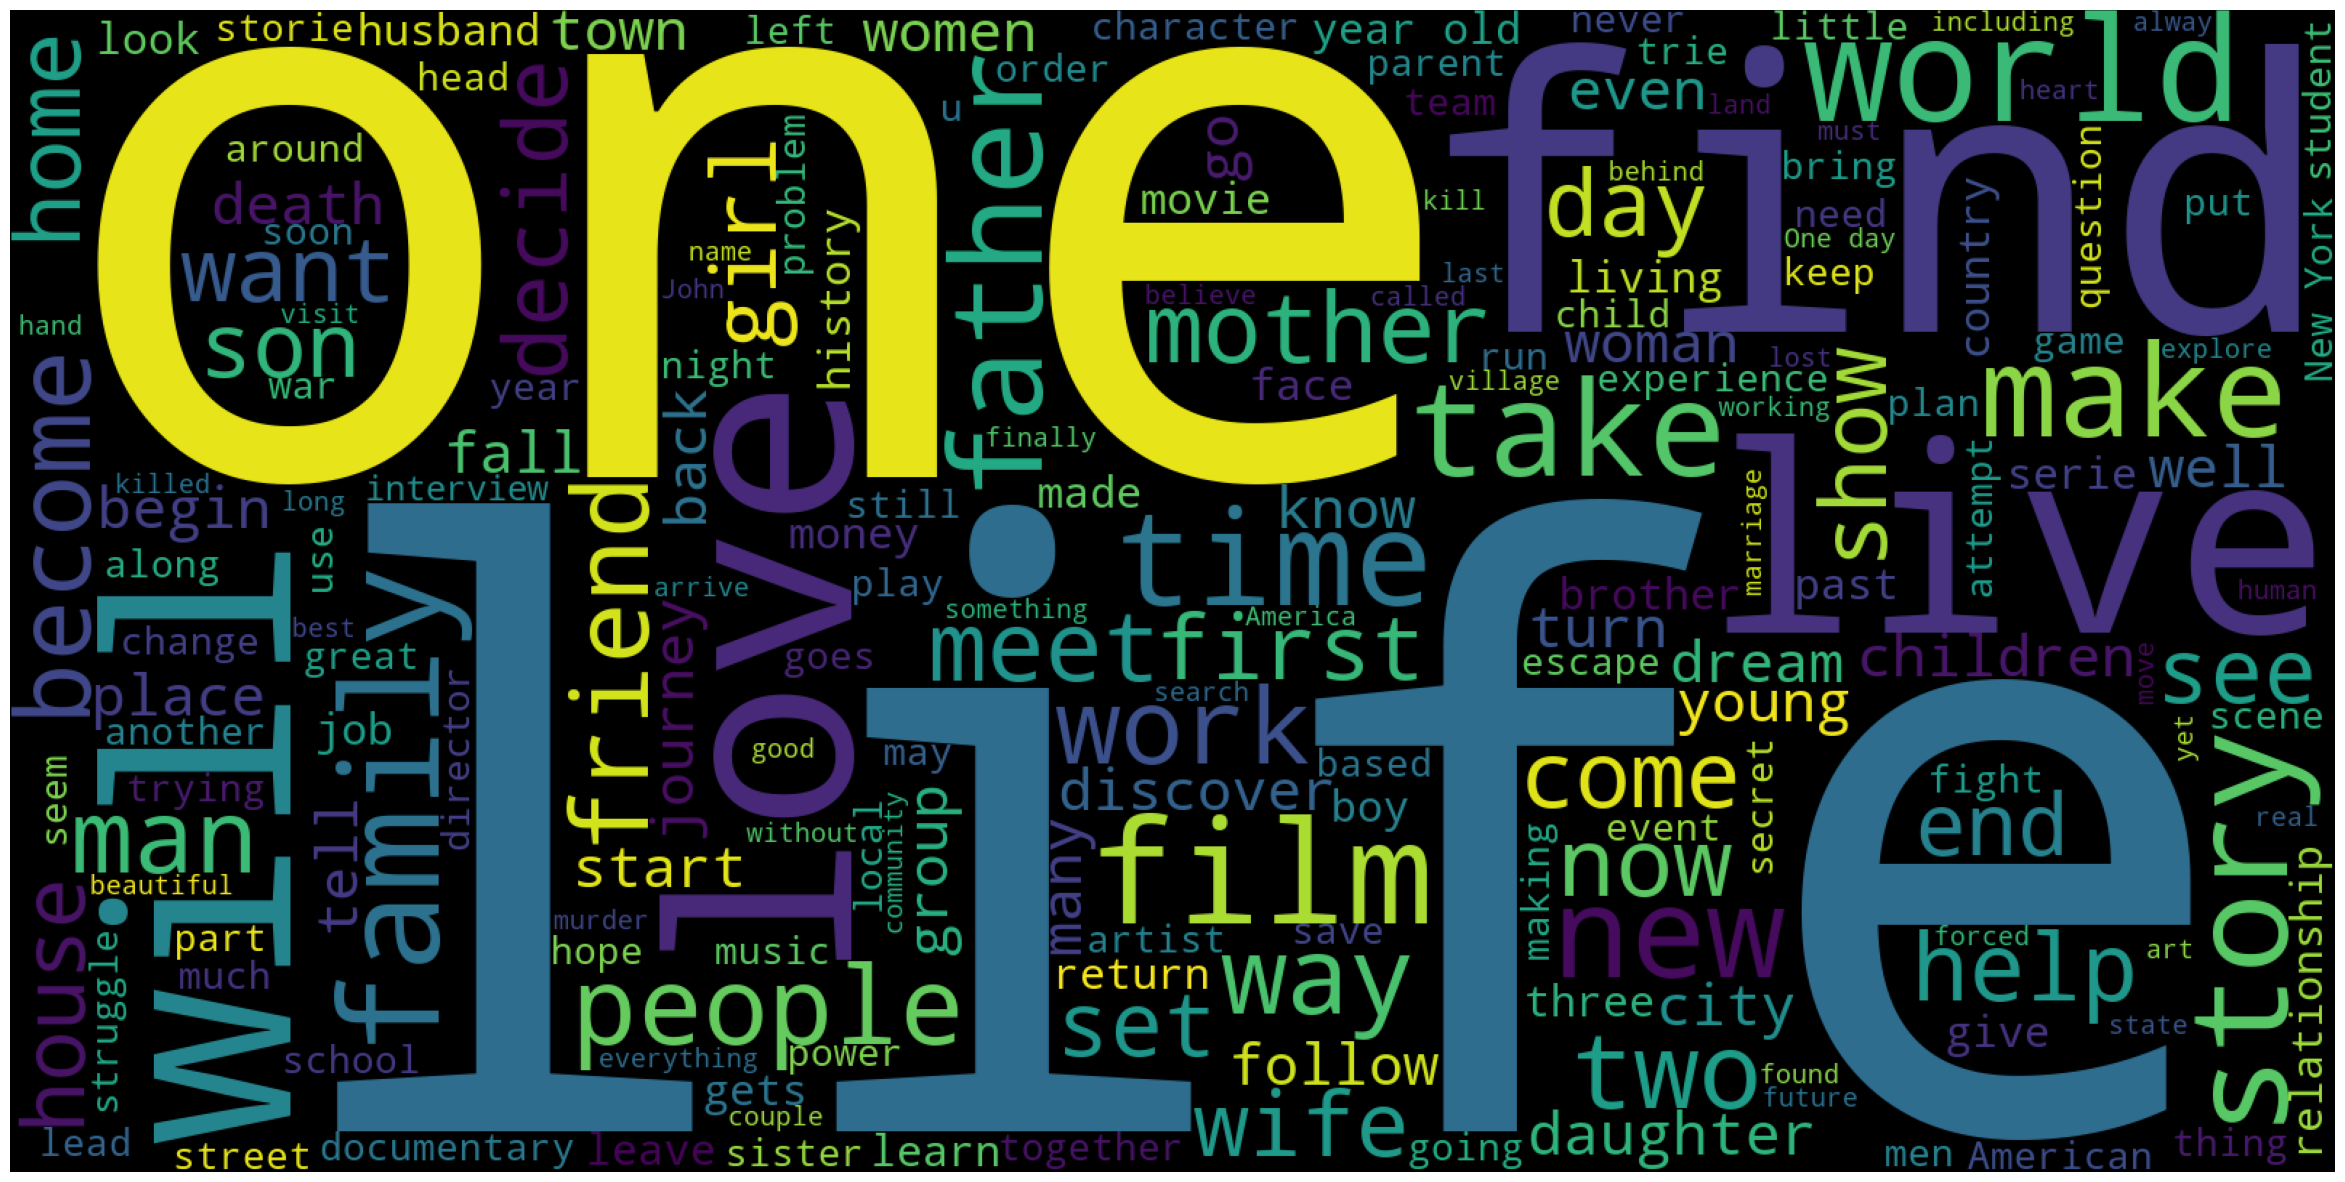

In [20]:
viz_word_cloud(train_data['Description'])

## Exploring the Data distribution of Target variable

In [21]:
train_data["Genre"].value_counts(normalize=True)

Genre
drama          0.251098
documentary    0.241561
comedy         0.137363
short          0.093574
horror         0.040654
thriller       0.029347
action         0.024256
western        0.019036
reality-tv     0.016306
family         0.014461
adventure      0.014295
music          0.013484
romance        0.012395
sci-fi         0.011934
adult          0.010883
crime          0.009315
animation      0.009186
sport          0.007968
talk-show      0.007212
fantasy        0.005958
mystery        0.005884
musical        0.005109
biography      0.004888
history        0.004482
game-show      0.003578
news           0.003339
war            0.002435
Name: proportion, dtype: float64

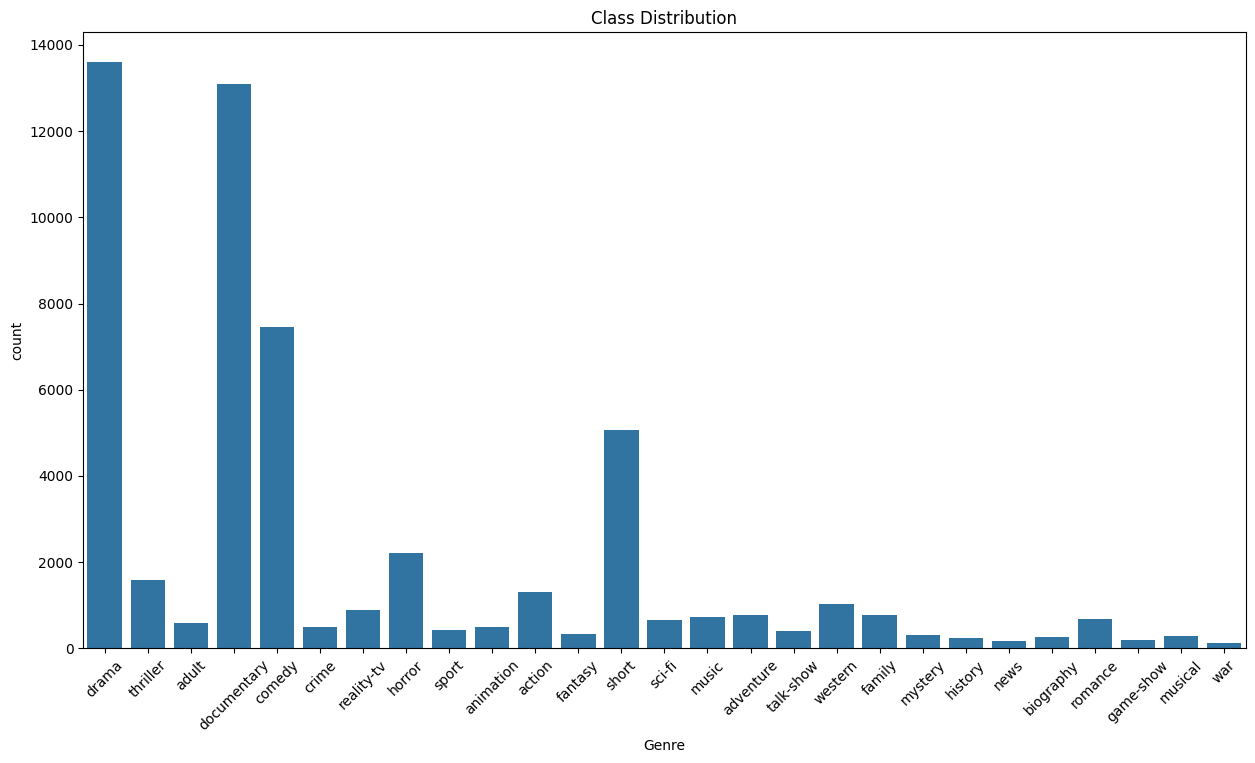

In [22]:
# visualizing it

fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Class Distribution")
sns.countplot(data=train_data, x="Genre")
plt.xticks(rotation=45)
plt.show()

## Visualizing most frequent Words

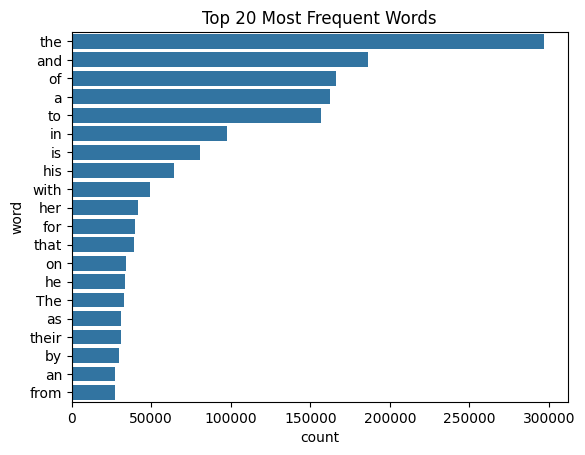

In [23]:
# !pip install collection
def viz_frequent_words(doc):
    from collections import Counter
    
    # Get all words in the text
    all_words = " ".join(doc.values).split()
    word_counts = Counter(all_words)
    
    # Get the most common words
    common_words = word_counts.most_common(20)
    
    # Convert to DataFrame for plotting
    common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
    
    # Plot the most common words
    sns.barplot(data=common_words_df, x='count', y='word')
    plt.title('Top 20 Most Frequent Words')
    plt.show()

viz_frequent_words(train_data['Description'])

## Step 3 Data Preprocessing
### Separating Feature and Target column of the Dataframe

In [24]:
features = "Description"
target = "Genre"

X_train, y_train = train_data[features], train_data[target]
print(X_train.head())
print(y_train.head())

0    Listening in to a conversation between his doc...
1    A brother and sister with a past incestuous re...
2    As the bus empties the students for their fiel...
3    To help their unemployed father make ends meet...
4    The film's title refers not only to the un-rec...
Name: Description, dtype: object
0       drama
1    thriller
2       adult
3       drama
4       drama
Name: Genre, dtype: object


## Text Cleaning

In [25]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean(doc): 
    
    # doc is a string of text
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    
    # Convert to lowercase
    doc = doc.lower()
        
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Stop word removal
    stop_words = list(set(stopwords.words('english')))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)

You should consider upgrading via the 'c:\users\azays\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azays\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azays\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azays\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Vectorize the descriptions using TF-IDF

In [26]:
!pip install scikit-learn

You should consider upgrading via the 'c:\users\azays\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [27]:
!pip install tqdm

from tqdm import tqdm
tqdm.pandas()

# importing Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_clean = X_train.progress_apply(lambda doc : clean(doc))
X_train_dtm = vectorizer.fit_transform(X_train_clean)
print(X_train_dtm.shape)

You should consider upgrading via the 'c:\users\azays\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54214/54214 [01:08<00:00, 796.21it/s]


(54214, 136080)


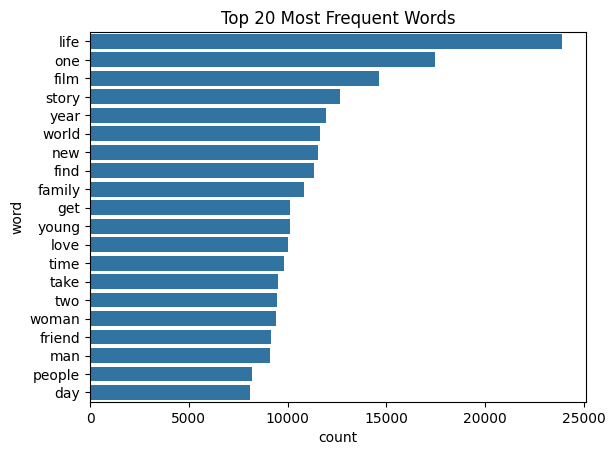

In [28]:
viz_frequent_words(X_train_clean)

## Step 4 Building a Model

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_dtm, y_train)

c:\users\azays\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 5 Evaluating the model

In [39]:
from sklearn.metrics import accuracy_score, f1_score

y_train_pred = model.predict(X_train_dtm)

print("Train accuracy : ", accuracy_score(y_train, y_train_pred))
print("Train Score (F1 Score) : ", f1_score(y_train, y_train_pred, average='weighted')) # weighted -> Calculates metrics for each label and find average 

Train accuracy :  0.7130261556055631
Train Score (F1 Score) :  0.6786421065384992


## Evaluating on test data

In [31]:
test_path = r"D:\My_Laptop\Downloads\CodeSoft\Genre Classification Dataset\test_data_solution.txt"

test_data = pd.read_csv(test_path, sep=" ::: ", names=column_names, engine="python")
test_data.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [32]:
X_test_clean = test_data["Description"].progress_apply(lambda doc: clean(doc))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54200/54200 [01:10<00:00, 768.09it/s]


In [40]:
# X_test = test_data["Description"]
y_test = test_data["Genre"]
X_test_dtm = vectorizer.transform(X_test_clean)

y_test_pred = model.predict(X_test_dtm)

print("Test accuracy : ", accuracy_score(y_test, y_test_pred))
print("Test Score (F1 Score) : ", f1_score(y_test, y_test_pred, average='weighted'))

Test accuracy :  0.5893173431734318
Test Score (F1 Score) :  0.5467718341219202
